In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Mouse

### Wang_Lung

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,lifestage,organ,organism,platform,region
AAACCTGAGACACGAC_1,type I pneumocyte,CL:0002062,alveolar type 1,Wang_Lung,postnatal day 3,Lung,Mus musculus,10x,pulmonary alveolar epithelium
AAACCTGAGACGCAAC_1,type I pneumocyte,CL:0002062,alveolar type 1,Wang_Lung,postnatal day 3,Lung,Mus musculus,10x,pulmonary alveolar epithelium
AAACCTGAGTGTGAAT_1,type I pneumocyte,CL:0002062,alveolar type 1,Wang_Lung,postnatal day 3,Lung,Mus musculus,10x,pulmonary alveolar epithelium
AAACCTGCAAGTCTGT_1,type I pneumocyte,CL:0002062,alveolar type 1,Wang_Lung,postnatal day 3,Lung,Mus musculus,10x,pulmonary alveolar epithelium
AAACCTGTCCGAGCCA_1,type I pneumocyte,CL:0002062,alveolar type 1,Wang_Lung,postnatal day 3,Lung,Mus musculus,10x,pulmonary alveolar epithelium


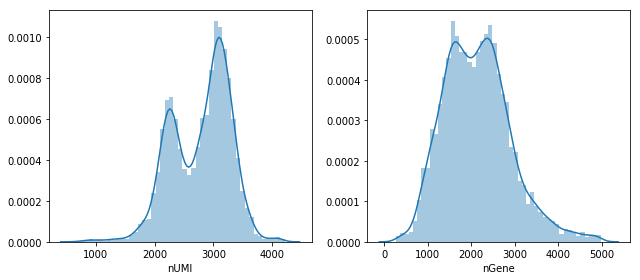

In [2]:
wang_lung = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Wang_Lung/data.h5")
utils.peek(wang_lung, "Wang_Lung")
wang_lung = wang_lung.normalize()
wang_lung.obs.head()

In [3]:
wang_lung_model = cb.directi.fit_DIRECTi(
    wang_lung, wang_lung.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Wang_Lung/model_0"
)
wang_lung.latent = wang_lung_model.inference(wang_lung)

[DIRECTi epoch 0] train=1.194, val=1.219, time elapsed=1.8s Best save...
[DIRECTi epoch 1] train=1.192, val=1.212, time elapsed=0.7s Best save...
[DIRECTi epoch 2] train=1.112, val=1.026, time elapsed=0.7s Best save...
[DIRECTi epoch 3] train=0.777, val=0.924, time elapsed=0.7s Best save...
[DIRECTi epoch 4] train=0.741, val=0.776, time elapsed=0.7s Best save...
[DIRECTi epoch 5] train=0.713, val=0.736, time elapsed=0.7s Best save...
[DIRECTi epoch 6] train=0.707, val=0.726, time elapsed=0.7s Best save...
[DIRECTi epoch 7] train=0.704, val=0.720, time elapsed=0.7s Best save...
[DIRECTi epoch 8] train=0.702, val=0.724, time elapsed=0.7s
[DIRECTi epoch 9] train=0.702, val=0.721, time elapsed=0.7s
[DIRECTi epoch 10] train=0.700, val=0.714, time elapsed=0.7s Best save...
[DIRECTi epoch 11] train=0.698, val=0.716, time elapsed=0.7s
[DIRECTi epoch 12] train=0.694, val=0.712, time elapsed=0.7s Best save...
[DIRECTi epoch 13] train=0.690, val=0.705, time elapsed=0.7s Best save...
[DIRECTi epoc

[  Info   ] Computing tSNE...


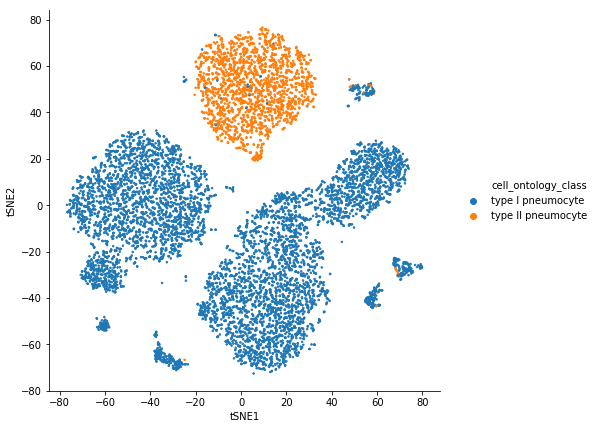

In [4]:
plot = wang_lung.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Wang_Lung/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


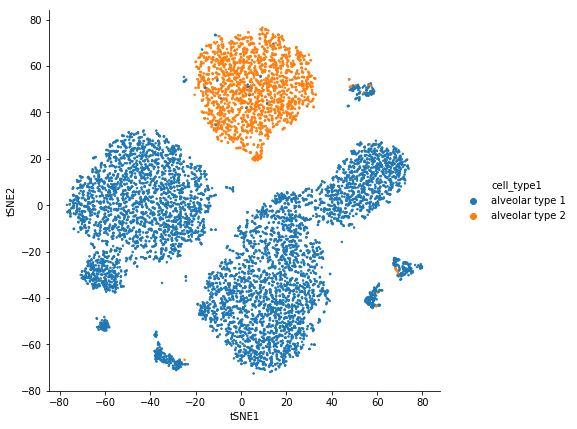

In [5]:
plot = wang_lung.visualize_latent("cell_type1")
plot.get_figure().savefig("Wang_Lung/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


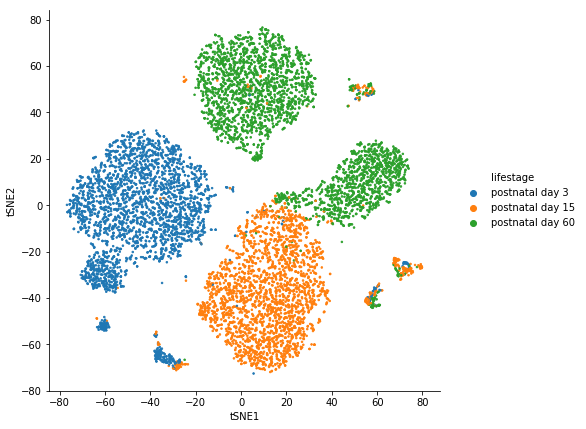

In [6]:
plot = wang_lung.visualize_latent("lifestage")
plot.get_figure().savefig("Wang_Lung/lifestage.pdf", bbox_inches="tight")

In [7]:
%%capture capio
wang_lung_models = [wang_lung_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    wang_lung_models.append(cb.directi.fit_DIRECTi(
        wang_lung, wang_lung.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Wang_Lung/model_%d" % i
    ))
wang_lung_blast = cb.blast.BLAST(wang_lung_models, wang_lung, keep_exprs=True).build_empirical()
wang_lung_blast.save("Wang_Lung")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Wang_Lung/model_1/checkpoint-55
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Wang_Lung/model_2/checkpoint-75
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Wang_Lung/model_3/checkpoint-94


In [8]:
with open("Wang_Lung/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Wang_Lung/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(wang_lung_blast, "Wang_Lung")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9011
Accuracy = 0.9985


### Quake_10x_Lung

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P7_8_AAACGGGAGGATATAC,myeloid cell,CL:0000763,myeloid cell,20.0,Quake_10x_Lung,3-F-56,dendritic cells and interstital macrophages,F,Lung,Mus musculus,10X_P7_8,10x,
10X_P7_8_AAACGGGTCTCGTATT,alveolar macrophage,CL:0000583,alveolar macrophage,5.0,Quake_10x_Lung,3-F-56,,F,Lung,Mus musculus,10X_P7_8,10x,
10X_P7_8_AAAGATGCAGATCTGT,B cell,CL:0000236,B cell,12.0,Quake_10x_Lung,3-F-56,,F,Lung,Mus musculus,10X_P7_8,10x,
10X_P7_8_AAATGCCAGATAGTCA,natural killer cell,CL:0000623,natural killer cell,7.0,Quake_10x_Lung,3-F-56,,F,Lung,Mus musculus,10X_P7_8,10x,
10X_P7_8_AAATGCCCAAACTGCT,T cell,CL:0000084,T cell,21.0,Quake_10x_Lung,3-F-56,,F,Lung,Mus musculus,10X_P7_8,10x,


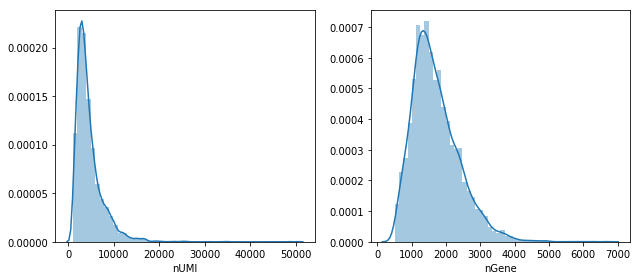

In [10]:
quake_10x_lung = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Lung/data.h5")
utils.peek(quake_10x_lung, "Quake_10x_Lung")
quake_10x_lung = quake_10x_lung.normalize()
quake_10x_lung.obs.head()

In [11]:
opt_model_kwargs = dict(batch_effect="donor")
quake_10x_lung_model = cb.directi.fit_DIRECTi(
    quake_10x_lung, quake_10x_lung.uns["seurat_genes"],
    **fixed_model_kwargs,  **opt_model_kwargs,
    path="/tmp/cb/db/Quake_10x_Lung/model_0"
)
quake_10x_lung.latent = quake_10x_lung_model.inference(quake_10x_lung)

[DIRECTi epoch 0] train=2.316, val=2.307, time elapsed=1.5s Regular save...
[DIRECTi epoch 1] train=2.307, val=2.292, time elapsed=0.5s
[DIRECTi epoch 2] train=2.283, val=2.256, time elapsed=0.5s
[DIRECTi epoch 3] train=2.055, val=1.396, time elapsed=0.5s
[DIRECTi epoch 4] train=1.012, val=1.137, time elapsed=0.5s
[DIRECTi epoch 5] train=0.926, val=1.030, time elapsed=0.5s
[DIRECTi epoch 6] train=0.922, val=1.102, time elapsed=0.5s
[DIRECTi epoch 7] train=0.898, val=0.879, time elapsed=0.5s
[DIRECTi epoch 8] train=0.838, val=0.838, time elapsed=0.5s
[DIRECTi epoch 9] train=0.830, val=0.832, time elapsed=0.5s
[DIRECTi epoch 10] train=0.824, val=0.822, time elapsed=0.5s Regular save...
[DIRECTi epoch 11] train=0.820, val=0.822, time elapsed=0.5s
[DIRECTi epoch 12] train=0.815, val=0.818, time elapsed=0.5s
[DIRECTi epoch 13] train=0.809, val=0.822, time elapsed=0.5s
[DIRECTi epoch 14] train=0.804, val=0.807, time elapsed=0.5s
[DIRECTi epoch 15] train=0.798, val=0.797, time elapsed=0.5s
[D

[  Info   ] Computing tSNE...


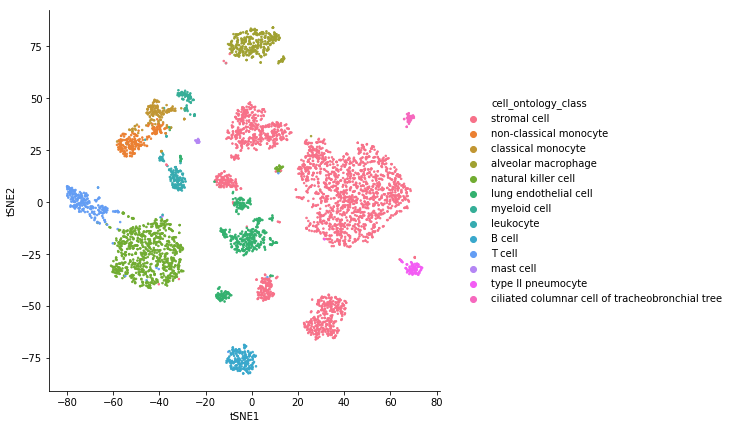

In [12]:
plot = quake_10x_lung.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Quake_10x_Lung/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


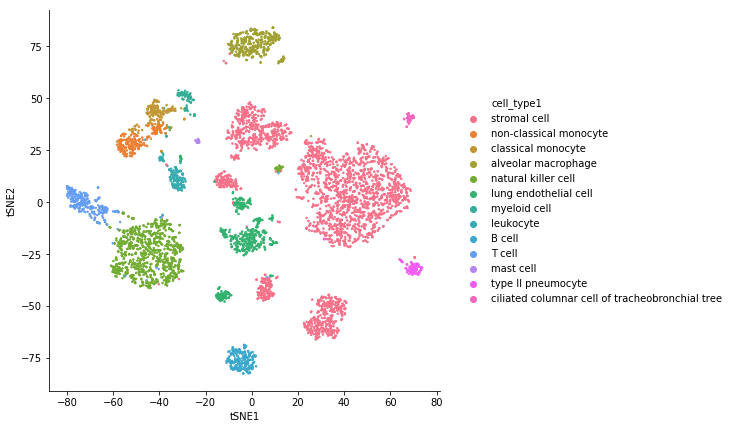

In [13]:
plot = quake_10x_lung.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Lung/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


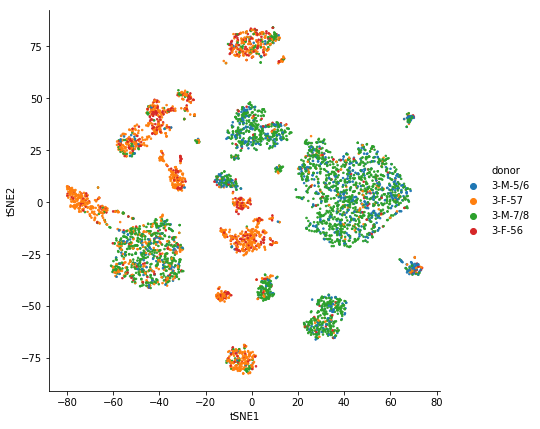

In [14]:
plot = quake_10x_lung.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Lung/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


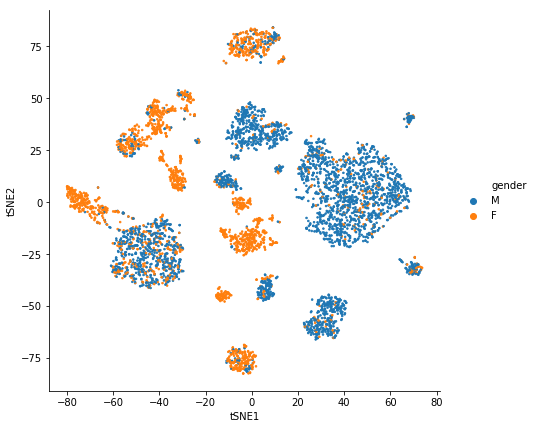

In [15]:
plot = quake_10x_lung.visualize_latent("gender")
plot.get_figure().savefig("Quake_10x_Lung/gender.pdf", bbox_inches="tight")

In [16]:
%%capture capio
quake_10x_lung_models = [quake_10x_lung_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_lung_models.append(cb.directi.fit_DIRECTi(
        quake_10x_lung, quake_10x_lung.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x_Lung/model_%d" % i
    ))
quake_10x_lung_blast = cb.blast.BLAST(quake_10x_lung_models, quake_10x_lung, keep_exprs=True).build_empirical()
quake_10x_lung_blast.save("Quake_10x_Lung")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Lung/model_1/checkpoint-106
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Lung/model_2/checkpoint-135
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Lung/model_3/checkpoint-144


In [17]:
with open("Quake_10x_Lung/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Lung/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [18]:
utils.self_projection(quake_10x_lung_blast, "Quake_10x_Lung")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9774
Accuracy = 0.9926


### Quake_Smart-seq2_Lung

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
B12.MAA000526.3_9_M.1.1,stromal cell,CL:0000499,stromal cell,MAA000526,2.0,Quake_Smart-seq2_Lung,3_9_M,,M,Lung,Mus musculus,Smart-seq2,
D4.MAA000526.3_9_M.1.1,epithelial cell of lung,CL:0000082,epithelial cell of lung,MAA000526,5.0,Quake_Smart-seq2_Lung,3_9_M,"alveolar epithelial type 1 cells, alveolar epi...",M,Lung,Mus musculus,Smart-seq2,
E11.MAA000526.3_9_M.1.1,stromal cell,CL:0000499,stromal cell,MAA000526,2.0,Quake_Smart-seq2_Lung,3_9_M,,M,Lung,Mus musculus,Smart-seq2,
G6.MAA000526.3_9_M.1.1,lung endothelial cell,CL:1001567,lung endothelial cell,MAA000526,18.0,Quake_Smart-seq2_Lung,3_9_M,,M,Lung,Mus musculus,Smart-seq2,
H14.MAA000526.3_9_M.1.1,stromal cell,CL:0000499,stromal cell,MAA000526,2.0,Quake_Smart-seq2_Lung,3_9_M,,M,Lung,Mus musculus,Smart-seq2,


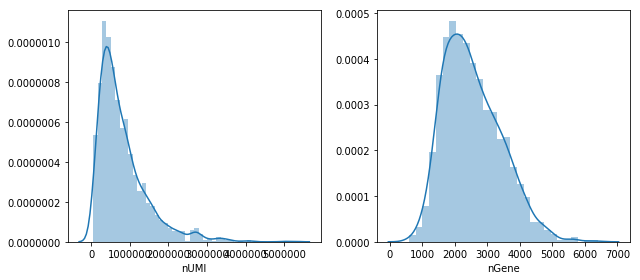

In [19]:
quake_smart_seq2_lung = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Lung/data.h5")
utils.peek(quake_smart_seq2_lung, "Quake_Smart-seq2_Lung")
quake_smart_seq2_lung = quake_smart_seq2_lung.normalize()
quake_smart_seq2_lung.obs.head()

In [20]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_lung_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_lung, quake_smart_seq2_lung.uns["seurat_genes"],
    **fixed_model_kwargs,  **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Lung/model_0"
)
quake_smart_seq2_lung.latent = quake_smart_seq2_lung_model.inference(quake_smart_seq2_lung)

[DIRECTi epoch 0] train=2.439, val=2.596, time elapsed=1.1s Regular save...
[DIRECTi epoch 1] train=2.430, val=2.593, time elapsed=0.2s
[DIRECTi epoch 2] train=2.431, val=2.588, time elapsed=0.1s
[DIRECTi epoch 3] train=2.425, val=2.582, time elapsed=0.1s
[DIRECTi epoch 4] train=2.417, val=2.575, time elapsed=0.1s
[DIRECTi epoch 5] train=2.412, val=2.568, time elapsed=0.1s
[DIRECTi epoch 6] train=2.404, val=2.558, time elapsed=0.1s
[DIRECTi epoch 7] train=2.392, val=2.547, time elapsed=0.1s
[DIRECTi epoch 8] train=2.382, val=2.531, time elapsed=0.1s
[DIRECTi epoch 9] train=2.361, val=2.505, time elapsed=0.1s
[DIRECTi epoch 10] train=2.320, val=2.445, time elapsed=0.1s Regular save...
[DIRECTi epoch 11] train=2.162, val=2.236, time elapsed=0.1s
[DIRECTi epoch 12] train=1.740, val=1.600, time elapsed=0.1s
[DIRECTi epoch 13] train=1.029, val=0.941, time elapsed=0.1s
[DIRECTi epoch 14] train=0.755, val=0.851, time elapsed=0.1s
[DIRECTi epoch 15] train=0.719, val=0.861, time elapsed=0.1s
[D

[  Info   ] Computing tSNE...


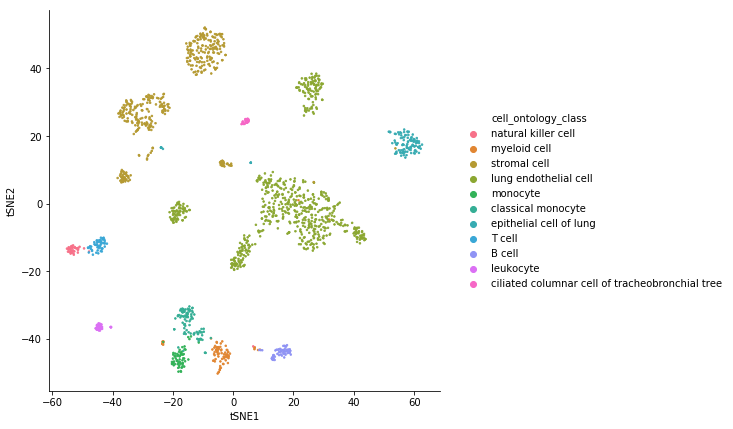

In [21]:
plot = quake_smart_seq2_lung.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Quake_Smart-seq2_Lung/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


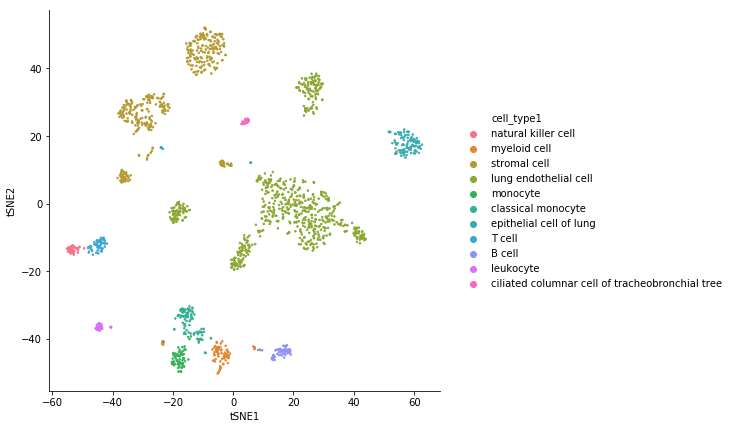

In [22]:
plot = quake_smart_seq2_lung.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Lung/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


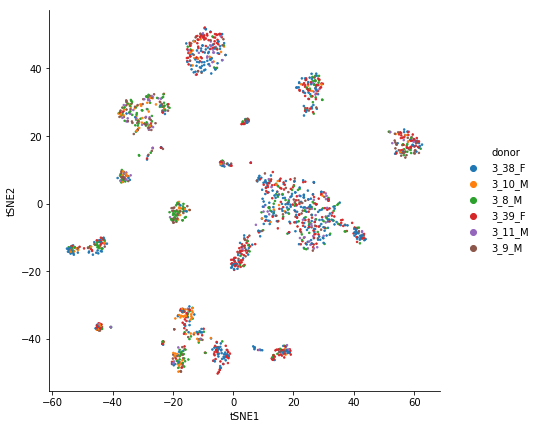

In [23]:
plot = quake_smart_seq2_lung.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Lung/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


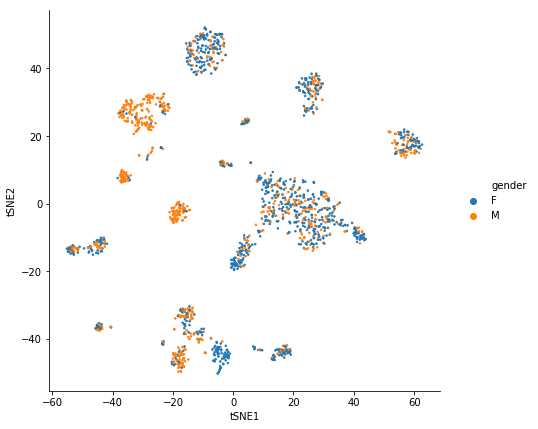

In [24]:
plot = quake_smart_seq2_lung.visualize_latent("gender")
plot.get_figure().savefig("Quake_Smart-seq2_Lung/gender.pdf", bbox_inches="tight")

In [25]:
%%capture capio
quake_smart_seq2_lung_models = [quake_smart_seq2_lung_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_lung_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_lung, quake_smart_seq2_lung.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Lung/model_%d" % i
    ))
quake_smart_seq2_lung_blast = cb.blast.BLAST(
    quake_smart_seq2_lung_models, quake_smart_seq2_lung, keep_exprs=True).build_empirical()
quake_smart_seq2_lung_blast.save("Quake_Smart-seq2_Lung")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Lung/model_1/checkpoint-228
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Lung/model_2/checkpoint-233
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Lung/model_3/checkpoint-231


In [26]:
with open("Quake_Smart-seq2_Lung/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Lung/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [27]:
utils.self_projection(quake_smart_seq2_lung_blast, "Quake_Smart-seq2_Lung")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9815
Accuracy = 0.9915


### Mouse aligned

In [28]:
if not os.path.exists("ALIGNED_Mus_musculus_Lung"):
    os.makedirs("ALIGNED_Mus_musculus_Lung")
lee = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Lee/data.h5").normalize()
quake_10x_lung.obs["quake_10x_lung_donor"] = quake_10x_lung.obs["donor"]
quake_smart_seq2_lung.obs["quake_smart_seq2_lung_donor"] = quake_smart_seq2_lung.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    wang_lung=wang_lung,
    lee=lee,
    quake_10x_lung=quake_10x_lung,
    quake_smart_seq2_lung=quake_smart_seq2_lung
), merge_uns_slots=["seurat_genes"])

[ Warning ] 10975 out of 25536 variables are not found, will be set to zero!
[ Warning ] 3260 out of 25536 variables are not found, will be set to zero!
[ Warning ] 2195 out of 25536 variables are not found, will be set to zero!
[ Warning ] 2195 out of 25536 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [29]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "quake_10x_lung_donor", "quake_smart_seq2_lung_donor"],
    rmbatch_module_kwargs=[dict(lambda_reg=0.003), dict(lambda_reg=0.005), dict(lambda_reg=0.005)]
)
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs,  **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Lung/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=1.398, val=1.394, time elapsed=3.4s Regular save...
[DIRECTi epoch 1] train=1.041, val=0.824, time elapsed=2.1s
[DIRECTi epoch 2] train=0.647, val=0.685, time elapsed=2.1s
[DIRECTi epoch 3] train=0.627, val=0.630, time elapsed=2.1s
[DIRECTi epoch 4] train=0.604, val=0.602, time elapsed=2.1s
[DIRECTi epoch 5] train=0.590, val=0.587, time elapsed=2.1s
[DIRECTi epoch 6] train=0.579, val=0.579, time elapsed=2.1s
[DIRECTi epoch 7] train=0.569, val=0.567, time elapsed=2.1s
[DIRECTi epoch 8] train=0.561, val=0.563, time elapsed=2.1s
[DIRECTi epoch 9] train=0.557, val=0.557, time elapsed=2.1s
[DIRECTi epoch 10] train=0.553, val=0.554, time elapsed=2.1s Regular save...
[DIRECTi epoch 11] train=0.550, val=0.551, time elapsed=2.1s
[DIRECTi epoch 12] train=0.548, val=0.549, time elapsed=2.1s
[DIRECTi epoch 13] train=0.546, val=0.550, time elapsed=2.1s
[DIRECTi epoch 14] train=0.544, val=0.547, time elapsed=2.2s
[DIRECTi epoch 15] train=0.543, val=0.545, time elapsed=2.2s
[D

[  Info   ] Computing tSNE...


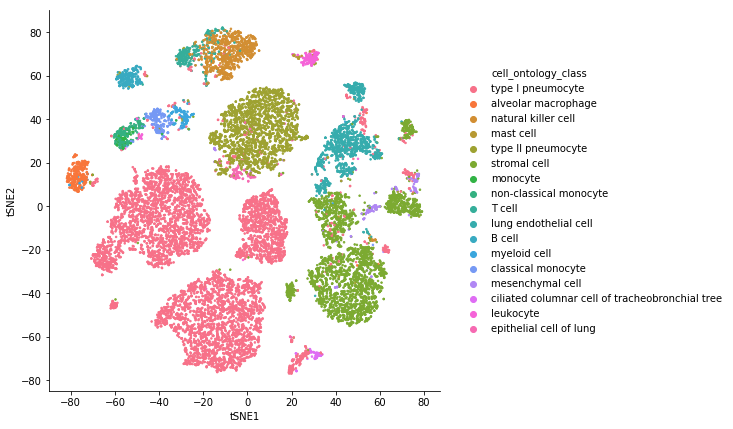

In [30]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Lung/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


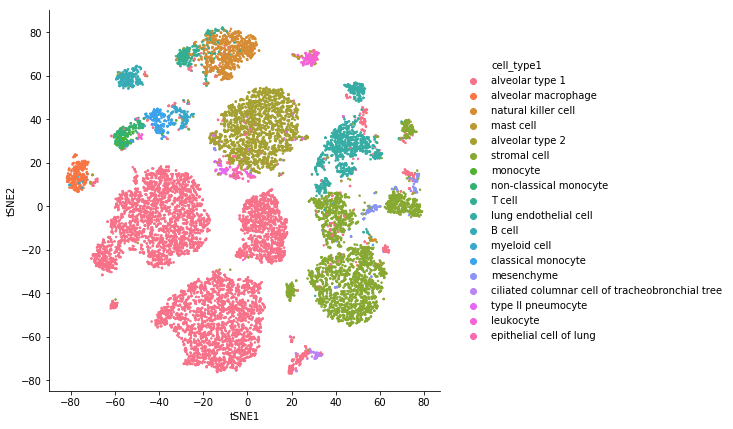

In [31]:
plot = mouse.visualize_latent("cell_type1")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Lung/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


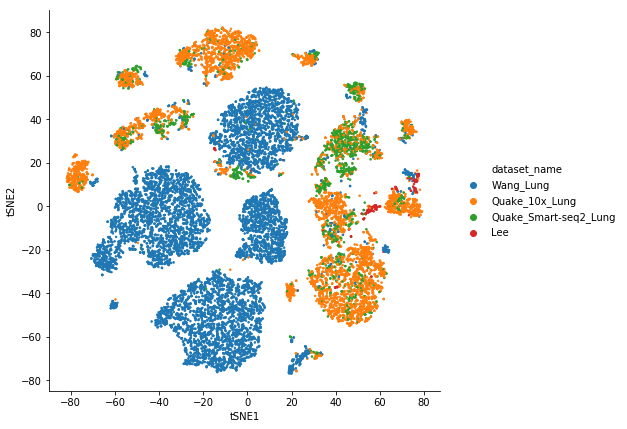

In [32]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Lung/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


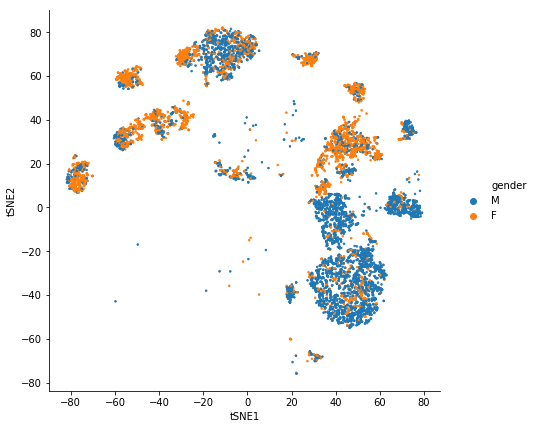

In [33]:
plot = mouse.visualize_latent("gender")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Lung/gender.pdf", bbox_inches="tight")

In [34]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Lung/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(
    mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Lung")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Lung/model_1/checkpoint-89
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Lung/model_2/checkpoint-97
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Lung/model_3/checkpoint-43


In [35]:
with open("ALIGNED_Mus_musculus_Lung/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Lung/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [36]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Lung")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9590
Accuracy = 0.9802
